In [1]:
pip install Cython


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Users\ADMIN\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install pystan==2.19.1.1

In [ ]:
pip install prophet

In [4]:
import pandas as pd

In [5]:
df_1=pd.read_csv(r"C:\Users\ADMIN\Desktop\Tmin2000_2021.csv")

In [6]:
from matplotlib import pyplot

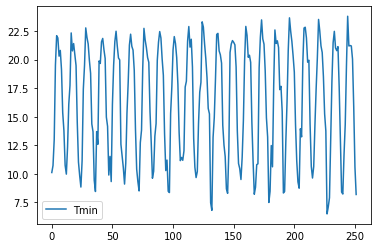

In [7]:
df_1.plot()
pyplot.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

D:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

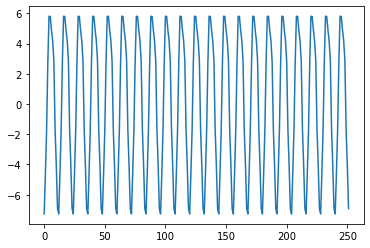

In [16]:
result=seasonal_decompose(df_1['Tmin'], model='additionable', period=12)
result.seasonal.plot()


<AxesSubplot:>

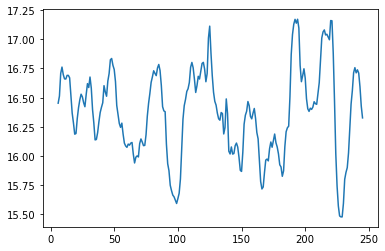

In [17]:
result.trend.plot()

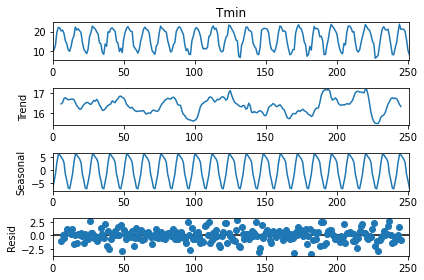

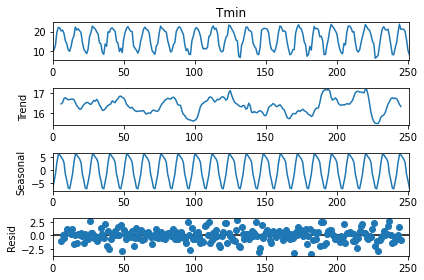

In [18]:
result.plot()

In [21]:
df_1

,Date,Tmin
0,01-01-2000,10.12
1,01-02-2000,10.73
2,01-03-2000,13.01
3,01-04-2000,19.51
4,01-05-2000,22.09
...,...,...
247,01-08-2020,21.19
248,01-09-2020,20.04
249,01-10-2020,15.86
250,01-11-2020,10.60


In [22]:
df=df_1.dropna()

In [23]:
df.head(54)

,Date,Tmin
0,01-01-2000,10.12
1,01-02-2000,10.73
2,01-03-2000,13.01
3,01-04-2000,19.51
4,01-05-2000,22.09
5,01-06-2000,21.89
6,01-07-2000,20.30
7,01-08-2000,20.80
8,01-09-2000,19.13
9,01-10-2000,15.37


In [24]:
from prophet import Prophet

In [25]:
import numpy as np

In [26]:
df_rename=df.rename(columns={'Date':'ds','Tmin':'y'})


In [27]:
df_rename.tail()

,ds,y
247,01-08-2020,21.19
248,01-09-2020,20.04
249,01-10-2020,15.86
250,01-11-2020,10.60
251,01-12-2020,8.20


In [44]:
train=df_rename[df_rename['ds']<'01-01-2018']
test=df_rename[df_rename['ds']>='01-01-2018']

In [45]:
model=Prophet()
model.fit(df_rename)

02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing


model=Prophet()
model.fit(df_rename)

In [46]:
future_data=model.make_future_dataframe(periods=12,freq='M')

In [47]:
forecast_data=model.predict(future_data)

In [48]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
252,2020-01-31,-38.382384,-40.508563,-36.431178
253,2020-02-29,-2.236100,-4.454826,0.105366
254,2020-03-31,10.888097,8.726544,12.830502
255,2020-04-30,17.113762,14.880248,19.203819
256,2020-05-31,15.173810,13.123809,17.335159
257,2020-06-30,8.524067,6.494954,10.673407
258,2020-07-31,2.151586,-0.034026,4.286772
259,2020-08-31,-2.777189,-4.939452,-0.669473
260,2020-09-30,-3.900990,-5.880197,-1.846715
261,2020-10-31,2.203049,-0.031947,4.227584


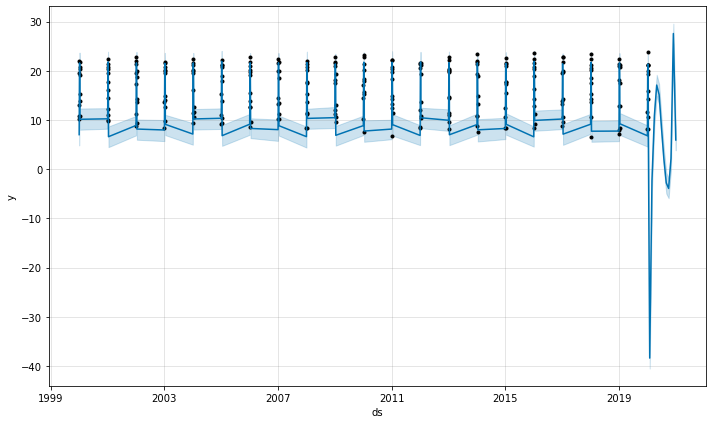

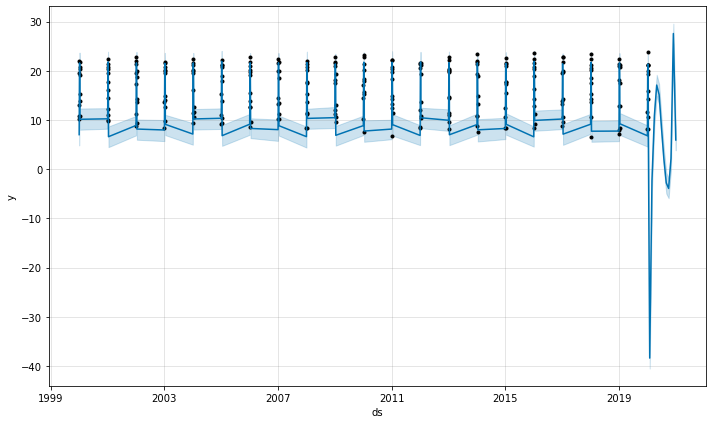

In [51]:
model.plot(forecast_data)

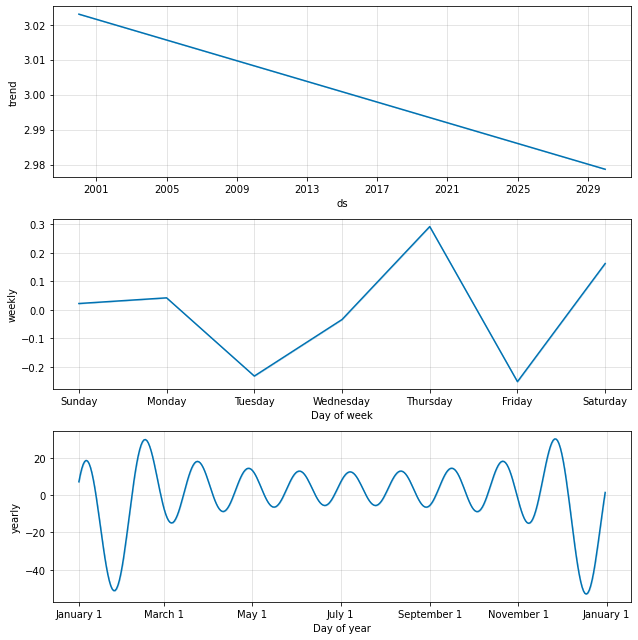

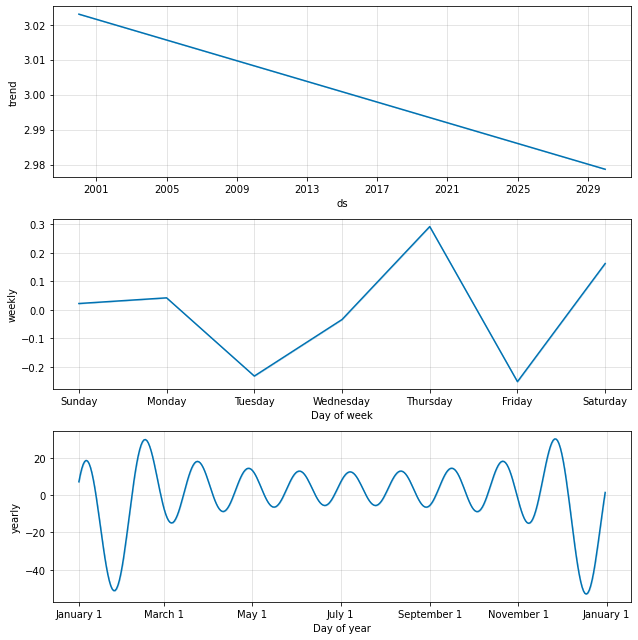

In [42]:
model.plot_components(forecast_data)

In [48]:
from prophet.plot import add_changepoints_to_plot

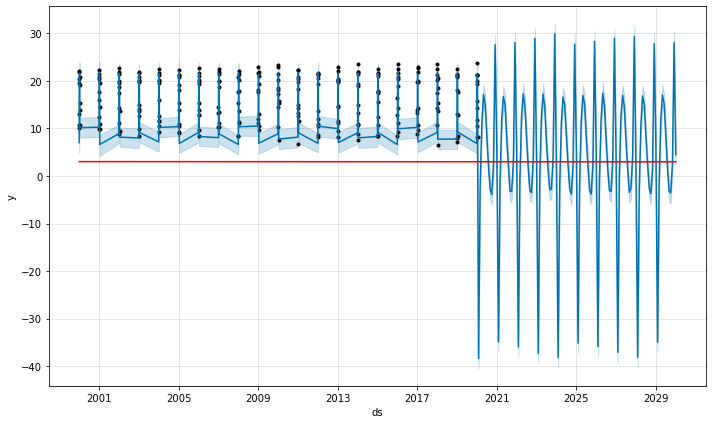

In [50]:
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)